In [1]:
from ISR.models import RDN, RRDN
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import gmtime, strftime
from pathlib import Path

Using TensorFlow backend.


## Params model and image paths

In [ ]:
# Params model and path pre-train weights
weights = 'weights/pre-train/rrdn-C4-D3-G32-G032-T10-x4/Perceptual/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5'
C = 4
D = 3
G = 32
G0 = 32
T = 10
scale = 4
dpi = 300
type = 'RRDN'

# Image paths
time = strftime("%Y-%m-%d_%H_%M_%S", gmtime())
path = 'Results/Source/'
path_sr = './'
name_model = 'sr_{type}_{c}_{d}_{g}_{g0}_{t}_{scale}_{time}.jpg'

lr = str(Path(path + 'lr.jpg'))
sr = str(Path(path_sr + name_model.format(type=type, c=C, d=D, g=G, g0=G0, t=T, scale=scale, time=time)))
bc = str(Path(path + 'bc.jpg'))

## Load model and predict

In [ ]:
%%time
if type is 'RDN':
    rdn = RDN(arch_params={'C': C, 'D': D, 'G': G, 'G0': G0, 'T': T, 'x': scale})
else:
    rdn = RRDN(arch_params={'C': C, 'D': D, 'G': G, 'G0': G0, 'T': T, 'x': scale})

rdn.model.load_weights(weights)
image_sr = rdn.predict(np.array(Image.open(lr)))
Image.fromarray(image_sr).save(sr, dpi=(dpi, dpi))

## Image rescale bicubic interpolation

In [ ]:
image_bc = np.array(Image.open(lr))

image_bc = cv2.resize(image_bc, 
                      dsize=(image_bc.shape[1]*scale, image_bc.shape[0]*scale), 
                      interpolation=cv2.INTER_CUBIC)

Image.fromarray(image_bc).save(bc, dpi=(dpi, dpi))


## Show crop images (Orginal, Model, Bicubic)

In [ ]:
paths = [bc, sr, lr]
label = ['Bicubic X{scale}'.format(scale=scale), 
         'Model X{scale}'.format(scale=scale), 
         'Original']
image_crops = path + 'crops.jpg'

In [6]:
columns = 2
rows = 2
w0, h0 = 75, 250
w1, h1 = 500, 350
figsize = (10, 4)

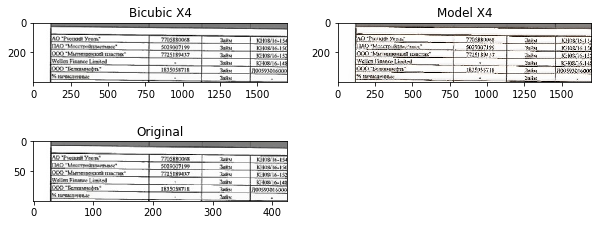

In [7]:
images = [np.array(Image.open(image)) for image in paths]
fig = plt.figure(figsize=figsize)

for i in range(1, len(images)+1):
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(label[i-1])
    dh = images[i-1].shape[0]//images[-1].shape[0]
    dw = images[i-1].shape[1]//images[-1].shape[1]
    plt.imshow(images[i-1][h0*dh:h1*dh, w0*dw:w1*dw])

plt.savefig(image_crops, dpi=dpi)
plt.show()